# Load packages and data

In [1]:
import logging
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from DecisionTreeClassifier import (
    DecisionTreeClassifier as CustomDecisionTreeClassifier,
)
from RandomForestClassifier import (
    RandomForestClassifier as CustomRandomForestClassifier,
)
from GradientBoostingClassifier import (
    GradientBoostingClassifier as CustomGradientBoostingClassifier,
)

from rich import print
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier as SklearnRandomForestClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier as SklearnGradientBoostingClassifier,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTreeClassifier
from sklearn.tree import plot_tree as plot_sklearn_tree
from utils import print_evaluation_metrics

logging.basicConfig(level=logging.INFO)

%load_ext rich
%load_ext autoreload 

%autoreload 2

## Titanic dataset

In [2]:
data = pd.read_csv("../data/train.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Embarked", "Sex"]

data = data.dropna(subset=["Age", "Embarked"])
data = data.drop("PassengerId", axis=1)

X = data.drop("Survived", axis=1)[features]
y = data["Survived"]

X = pd.get_dummies(X, columns=["Embarked", "Sex"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()


,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
472,2,33.0,1,2,27.7500,False,False,True,True,False
432,2,42.0,1,0,26.0000,False,False,True,True,False
666,2,25.0,0,0,13.0000,False,False,True,False,True
30,1,40.0,0,0,27.7208,True,False,False,False,True
291,1,19.0,1,0,91.0792,True,False,False,True,False


## Generated dataset

In [6]:
X, y = make_classification(
    n_samples=1000,
    n_features=30,
    n_classes=2,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 30), (200, 30), (800,), (200,))

In [7]:
hyperparameters = {
    "max_depth": 5,
    "min_samples_split": 15,
    "max_features": 7,
    "min_impurity_decrease": 0.001,
    "random_state": 42,
}

# Decision Tree


## Custom implementation

In [8]:
clf = CustomDecisionTreeClassifier(
    **hyperparameters,
    debug=True,
)

clf.fit(X_train, y_train)


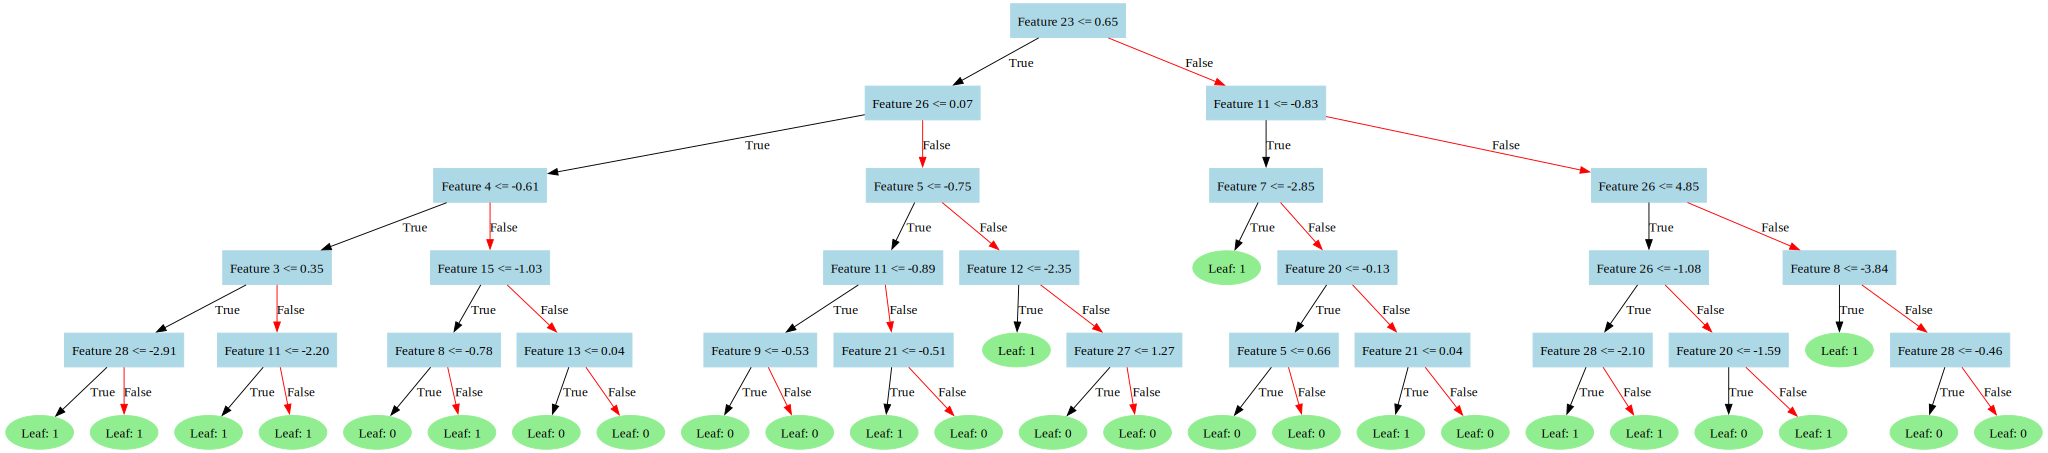

In [9]:
clf.visualize_tree()

In [10]:
preds = clf.predict(X_test)

Model: Custom Decision Tree Classifier
DecisionTreeClassifier(max_depth=5, min_samples_split=15, max_features=7, min_impurity_decrease=0.001, is_regression=False, random_state=42)
Accuracy: 0.86
Precision: 0.86
Recall: 0.8601440576230492
F1: 0.8599859985998599
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        98
           1       0.87      0.85      0.86       102

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



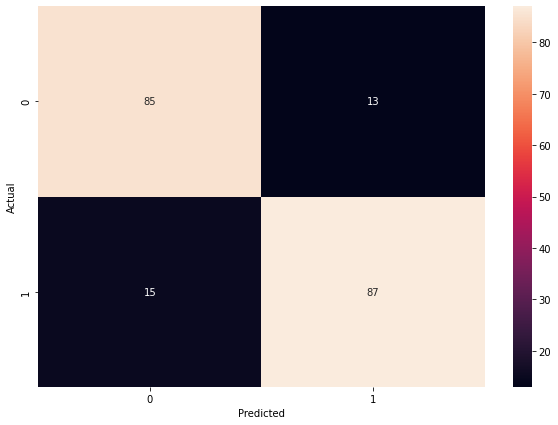

In [32]:
dt_metrics = print_evaluation_metrics(y_test, preds, clf, "Custom Decision Tree Classifier")


## Scikit-learn implementation

In [12]:
sklearn_clf = SklearnDecisionTreeClassifier(
    **hyperparameters,
    criterion="entropy",
)

sklearn_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=7,
                       min_impurity_decrease=0.001, min_samples_split=15,
                       random_state=42)

In [13]:
sklearn_preds = sklearn_clf.predict(X_test)

Model: Sklearn Decision Tree Classifier
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=7,
                       min_impurity_decrease=0.001, min_samples_split=15,
                       random_state=42)
Accuracy: 0.85
Precision: 0.8518667201926937
Recall: 0.8507402961184474
F1: 0.8499399759903962
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        98
           1       0.88      0.81      0.85       102

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



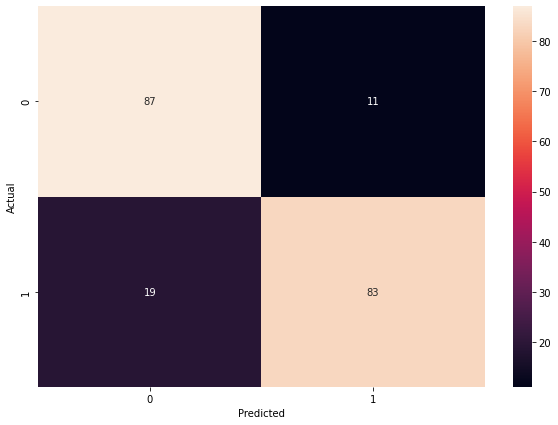

In [33]:
sklearn_dt_metrics = print_evaluation_metrics(
    y_test, sklearn_preds, sklearn_clf, "Sklearn Decision Tree Classifier"
)

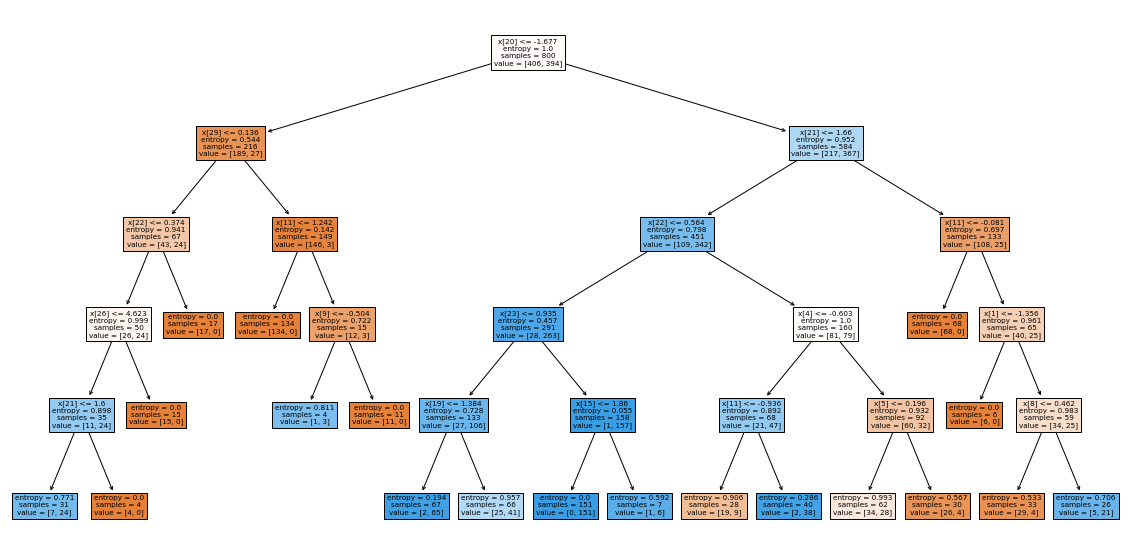

In [15]:
plt.figure(figsize=(20, 10))
sklearn_tree = plot_sklearn_tree(
    sklearn_clf,
    filled=True,
)

plt.show()

# Random Forest

## Custom implementation

In [15]:
rf_clf = CustomRandomForestClassifier(
    n_estimators=100,
    **hyperparameters,
    debug=True,
    n_jobs=-1,
    verbose=11
)

rf_clf.fit(X_train, y_train)
print(f"OOB Score: {rf_clf.oob_score_}")

DEBUG:RandomForestClassifier:Fitting 100 trees...
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   22.7s
[Para

OOB Score: 0.93125

In [16]:
rf_preds = rf_clf.predict(X_test)

DEBUG:RandomForestClassifier:Making predictions using 100 trees...


Model: Custom Random Forest Classifier
RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=15, max_features=7, min_impurity_decrease=0.001, random_state=42)
OOB Score: 0.93125
Accuracy: 0.92
Precision: 0.92
Recall: 0.9201680672268908
F1: 0.9199919991999201
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        98
           1       0.93      0.91      0.92       102

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



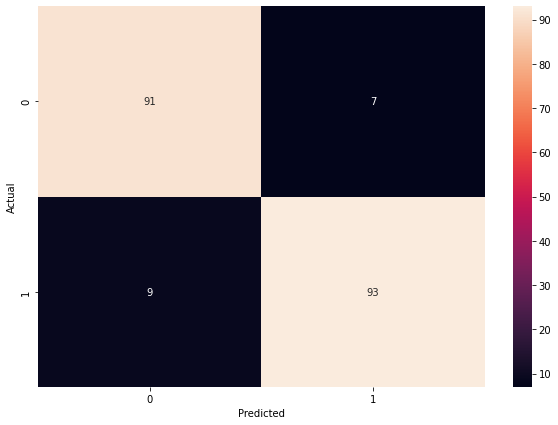

In [34]:
rf_metrics = print_evaluation_metrics(y_test, rf_preds, rf_clf, "Custom Random Forest Classifier")

Visualizing tree 82...

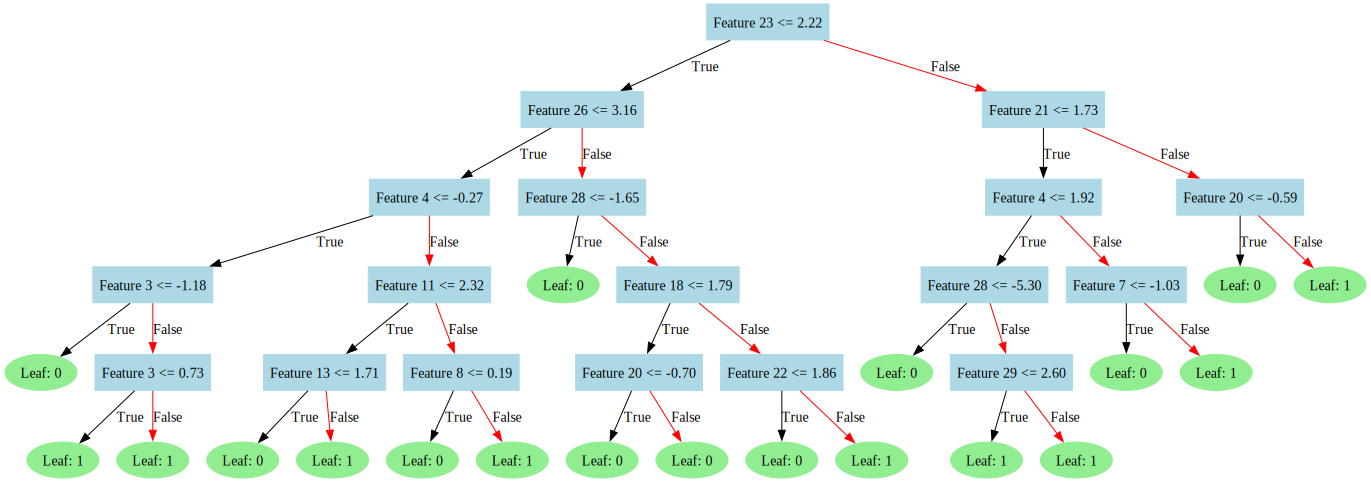

In [18]:
tree_idx = np.random.randint(0, rf_clf.n_estimators)

print(f"Visualizing tree {tree_idx}...")
rf_clf.trees[tree_idx].visualize_tree()


## Scikit-learn implementation

In [19]:
sklearn_rf_clf = SklearnRandomForestClassifier(
    n_estimators=100,
    **hyperparameters,
    oob_score=True,
    criterion="entropy",
    n_jobs=-1,
    verbose=1,
)

sklearn_rf_clf.fit(X_train, y_train)
print(f"OOB Score: {sklearn_rf_clf.oob_score_}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


OOB Score: 0.94875

In [35]:
sklearn_rf_preds = sklearn_rf_clf.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Model: Scikit-Learn Random Forest Classifier
RandomForestClassifier(criterion='entropy', max_depth=5, max_features=7,
                       min_impurity_decrease=0.001, min_samples_split=15,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)
OOB Score: 0.94875
Accuracy: 0.945
Precision: 0.9477265853412642
Recall: 0.9442777110844338
F1: 0.9448331201885705
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       102

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



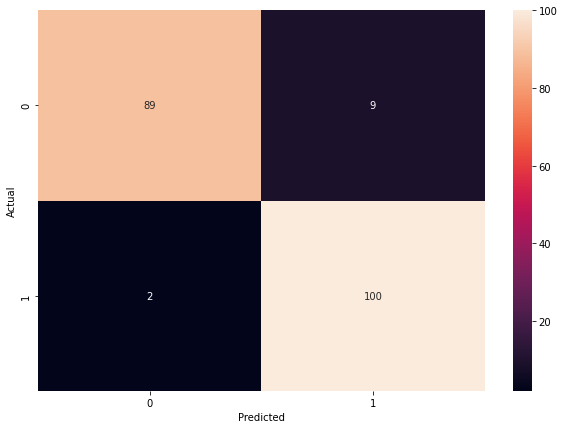

In [36]:
sklearn_rf_metrics = print_evaluation_metrics(
    y_test, sklearn_rf_preds, sklearn_rf_clf, "Scikit-Learn Random Forest Classifier"
)

Visualizing tree 82...

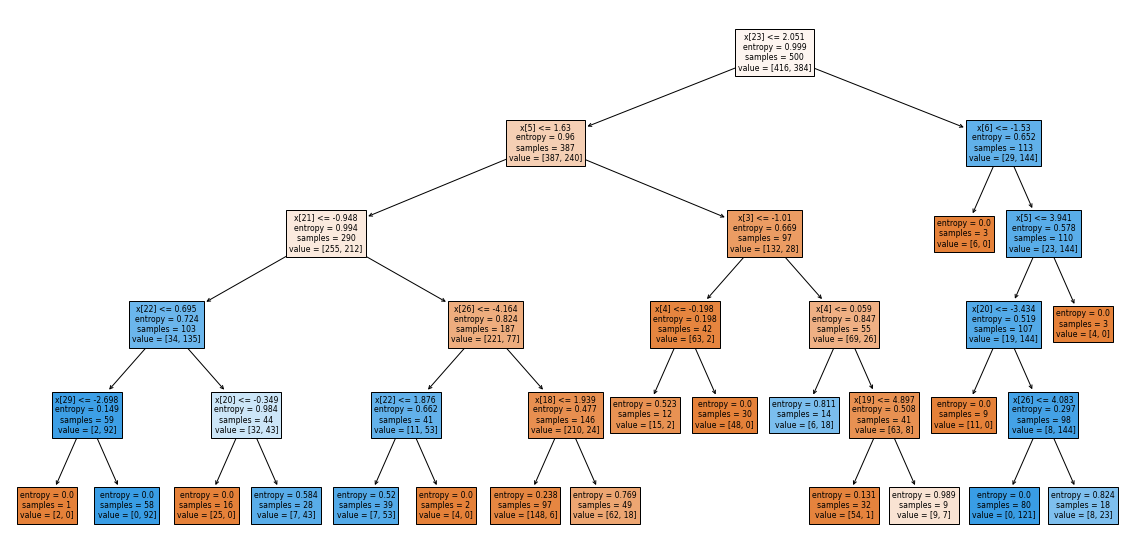

In [22]:
plt.figure(figsize=(20, 10))
print(f"Visualizing tree {tree_idx}...")
sklearn_rf_tree = plot_sklearn_tree(
    sklearn_rf_clf.estimators_[tree_idx],
    filled=True,
)

plt.show()

# Gradient Boosting

## Custom implementation

In [23]:
gb_clf = CustomGradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.3,
    **hyperparameters,
    debug=True,
)

gb_clf.fit(X_train, y_train)

DEBUG:GradientBoostingClassifier:Training tree 1...
DEBUG:GradientBoostingClassifier:Fitting tree 1...
DEBUG:GradientBoostingClassifier:Loss after fitting tree 1: 0.6353
DEBUG:GradientBoostingClassifier:Fitting tree 2...
DEBUG:GradientBoostingClassifier:Loss after fitting tree 2: 0.5880
DEBUG:GradientBoostingClassifier:Fitting tree 3...
DEBUG:GradientBoostingClassifier:Loss after fitting tree 3: 0.5494
DEBUG:GradientBoostingClassifier:Fitting tree 4...
DEBUG:GradientBoostingClassifier:Loss after fitting tree 4: 0.5116
DEBUG:GradientBoostingClassifier:Fitting tree 5...
DEBUG:GradientBoostingClassifier:Loss after fitting tree 5: 0.4789
DEBUG:GradientBoostingClassifier:Fitting tree 6...
DEBUG:GradientBoostingClassifier:Loss after fitting tree 6: 0.4482
DEBUG:GradientBoostingClassifier:Fitting tree 7...
DEBUG:GradientBoostingClassifier:Loss after fitting tree 7: 0.4222
DEBUG:GradientBoostingClassifier:Fitting tree 8...
DEBUG:GradientBoostingClassifier:Loss after fitting tree 8: 0.3971
DEBU

In [24]:
gb_preds = gb_clf.predict(X_test)

Model: Custom Gradient Boosting Classifier
GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=5, min_samples_split=15, max_features=7, min_impurity_decrease=0.001, random_state=42)
Accuracy: 0.92
Precision: 0.92
Recall: 0.9201680672268908
F1: 0.9199919991999201
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        98
           1       0.93      0.91      0.92       102

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



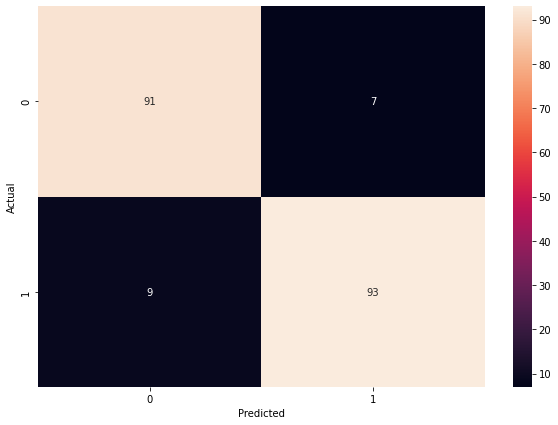

In [37]:
gb_metrics = print_evaluation_metrics(
    y_test, gb_preds, gb_clf, "Custom Gradient Boosting Classifier"
)

Visualizing tree 29...

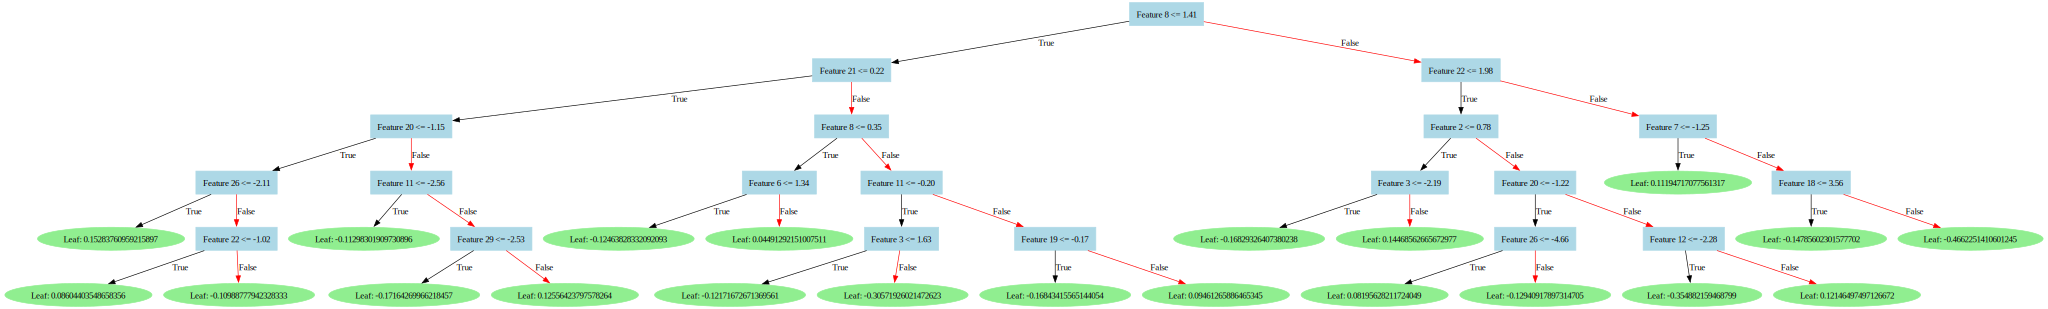

In [26]:
tree_idx = np.random.randint(0, gb_clf.n_estimators)

print(f"Visualizing tree {tree_idx}...")
gb_clf.trees[tree_idx].visualize_tree()



## Scikit-learn implementation

In [27]:
sklearn_gb_clf = SklearnGradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.3,
    **hyperparameters,
    verbose=3,
)

sklearn_gb_clf.fit(X_train, y_train)


      Iter       Train Loss   Remaining Time 
         1           1.0242            0.43s
         2           0.7794            0.48s
         3           0.6391            0.82s
         4           0.5171            0.61s
         5           0.4320            0.78s
         6           0.3555            0.89s
         7           0.2981            0.75s
         8           0.2487            0.84s
         9           0.2036            0.74s
        10           0.1743            0.80s
        11           0.1520            0.84s
        12           0.1289            0.76s
        13           0.1107            0.80s
        14           0.0962            0.74s
        15           0.0849            0.77s
        16           0.0746            0.71s
        17           0.0664            0.74s
        18           0.0600            0.69s
        19           0.0522            0.74s
        20           0.0453            0.73s
        21           0.0405            0.69s
        2

GradientBoostingClassifier(learning_rate=0.3, max_depth=5, max_features=7,
                           min_impurity_decrease=0.001, min_samples_split=15,
                           random_state=42, verbose=3)

In [28]:
gb_sklearn_preds = sklearn_gb_clf.predict(X_test)

Model: Scikit-Learn Gradient Boosting Classifier
GradientBoostingClassifier(learning_rate=0.3, max_depth=5, max_features=7,
                           min_impurity_decrease=0.001, min_samples_split=15,
                           random_state=42, verbose=3)
Accuracy: 0.96
Precision: 0.962157809983897
Recall: 0.9593837535014006
F1: 0.9598997493734336
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        98
           1       0.94      0.99      0.96       102

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



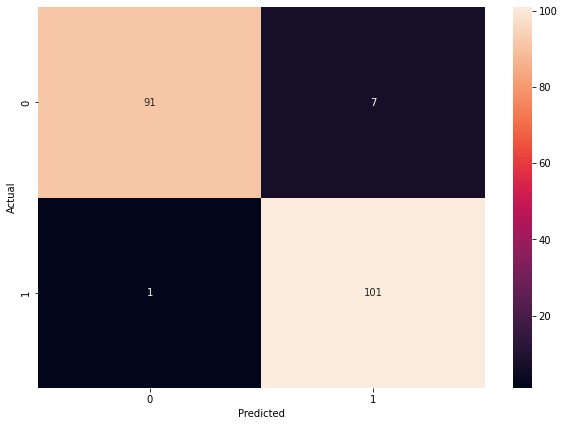

In [38]:
sklearn_gb_metrics = print_evaluation_metrics(
    y_test,
    gb_sklearn_preds,
    sklearn_gb_clf,
    "Scikit-Learn Gradient Boosting Classifier",
)


Visualizing tree 29...

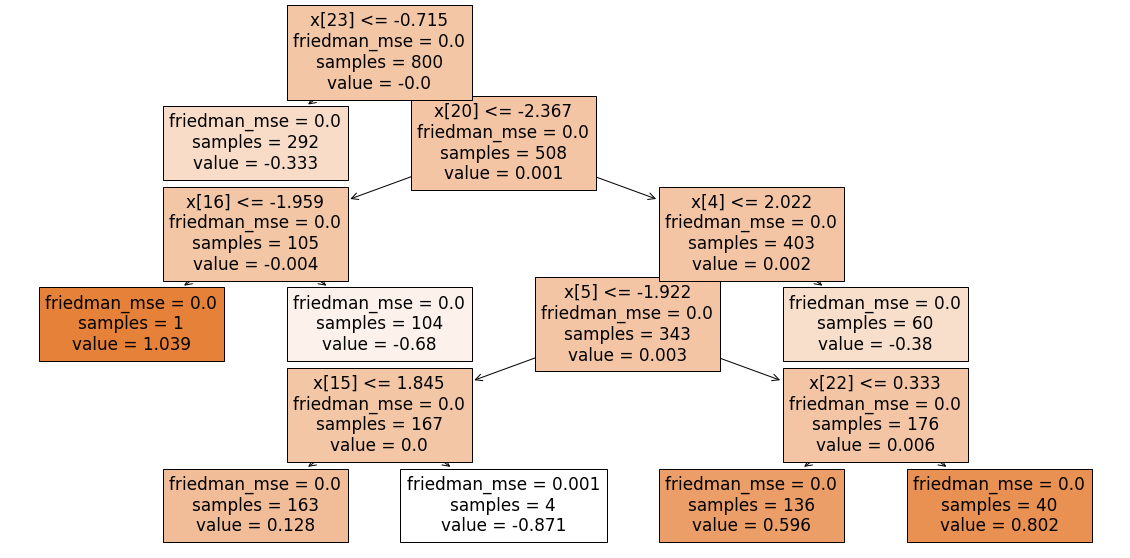

In [30]:
plt.figure(figsize=(20, 10))
print(f"Visualizing tree {tree_idx}...")
sklearn_gb_tree = plot_sklearn_tree(
    sklearn_gb_clf.estimators_[tree_idx][0],
    filled=True,
)

plt.show()

# Comparison

In [56]:
comparison = pd.DataFrame(
    {
        "Custom Decision Tree": dt_metrics,
        "Sklearn Decision Tree": sklearn_dt_metrics,
        "Custom Random Forest": rf_metrics,
        "Scikit-Learn Random Forest": sklearn_rf_metrics,
        "Custom Gradient Boosting": gb_metrics,
        "Scikit-Learn Gradient Boosting": sklearn_gb_metrics,
    }
).T.reset_index(drop=True)


comparison

,name,model,accuracy,precision,recall,f1,confusion_matrix
0,Custom Decision Tree Classifier,"DecisionTreeClassifier(max_depth=5, min_sample...",0.86,0.86,0.860144,0.859986,"[[85, 13], [15, 87]]"
1,Sklearn Decision Tree Classifier,"DecisionTreeClassifier(criterion='entropy', ma...",0.85,0.851867,0.85074,0.84994,"[[87, 11], [19, 83]]"
2,Custom Random Forest Classifier,"RandomForestClassifier(n_estimators=100, max_d...",0.92,0.92,0.920168,0.919992,"[[91, 7], [9, 93]]"
3,Scikit-Learn Random Forest Classifier,"(DecisionTreeClassifier(criterion='entropy', m...",0.945,0.947727,0.944278,0.944833,"[[89, 9], [2, 100]]"
4,Custom Gradient Boosting Classifier,"GradientBoostingClassifier(n_estimators=100, l...",0.92,0.92,0.920168,0.919992,"[[91, 7], [9, 93]]"
5,Scikit-Learn Gradient Boosting Classifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.96,0.962158,0.959384,0.9599,"[[91, 7], [1, 101]]"
